# TP2 Classification de voyelles par lois gaussiennes
NOM - PRÉNOM : LABORIE - RÉMI

Déposer le notebook sur moodle à la fin de la séance.

### Vérification des données


In [42]:
import pickle
import matplotlib.pyplot as plt
import numpy as np
import math

from sklearn.metrics import confusion_matrix

In [43]:
#1- Charger les données d'apprentissage avec le code suivant :
f = open('APP.pkl', 'rb')
dicoAPP = pickle.load(f)
app_aa = dicoAPP["aa"]
app_ii = dicoAPP["ii"]
app_uu = dicoAPP["uu"]
f.close()
# Vérifier le contenu et la taille des matrices
# Il s'agit de matrices 80x2 résultant d'une ACP sur une paramétrisation cepstrale (cf. TP1).
print(app_aa.shape)
print(app_ii.shape)
print(app_uu.shape)

classes = {
    0 : "aa",
    1 : "uu",
    2 : "ii"
}

(80, 2)
(80, 2)
(80, 2)


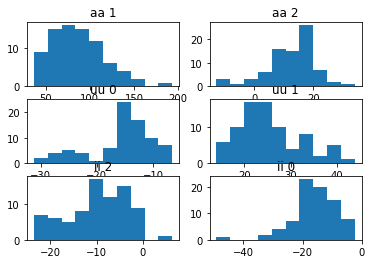

"\n    On remarque que l'on peut modéliser chaque paramètre par une variable aléatoire suivant une loi gaussienne.\n"

In [44]:
# 2- Afficher sur une seule figure, en utilisant subplot(nb_lignes, nb_colonnes, numero_trace), 
# l'histogramme de chacune des classes : aa, uu et ii.
def afficherPoints(mat):
    taille = mat.shape
    n = int(taille[0]/3)
    plt.figure()

    aa = mat[:n, :]
    uu = mat[n:2*n, :]
    ii = mat[2*n:, :]

    for index, X in enumerate([aa[:, 0], aa[:, 1], uu[:, 0], uu[:, 1], ii[:, 0], ii[:, 1]]):


        plt.subplot(3, 2, index + 1)
        if index < 2:
            plt.title("aa " + str((index+1) % 3))
        elif index < 4:
            plt.title("uu " + str((index+1) % 3))
        else:
            plt.title("ii " + str((index+1) % 3))
        plt.hist(X)

    plt.show()

R = np.vstack((app_aa, app_uu, app_ii))
afficherPoints(R)





# Que pouvez-vous conclure ? Ecrire quelques lignes pour exppiquer
"""
    On remarque que l'on peut modéliser chaque paramètre par une variable aléatoire suivant une loi gaussienne.
"""


### Utilisation de lois gaussiennes

In [45]:
#3- APPRENTISSAGE : estimer les paramètres (moyenne et matrice de covariance) de chaque classe. 
# Quelles sont les dimensions des variables crées ; que contiennent-elles ? 

def getMoments(X):
    moy = np.mean(X, axis=0)
    cov = np.cov(X.T)
    return moy, cov

aa_moy, aa_var = getMoments(app_aa)
uu_moy, uu_var = getMoments(app_uu)
ii_moy, ii_var = getMoments(app_ii)
print(aa_moy.shape, aa_var.shape)
print(confusion_matrix([0,0], [1,1]))

(2,) (2, 2)
[[0 2]
 [0 0]]


In [46]:
#4- RECONNAISSANCE : écrire une fonction classer qui renvoie la classe obtenue 
# par maximum de vraisemblance sur les lois gaussiennes estimées (modèle de chaque classe) 
# sur l'observation fournie en entrée :
def classer(observation, moyenne_aa, covariance_aa, moyenne_uu, covariance_uu, moyenne_ii, covariance_ii):

    moyennes = np.array([moyenne_aa, moyenne_uu, moyenne_ii])
    covariance = np.array([covariance_aa, covariance_uu, covariance_ii])
    gauss = []

    for k in range(3):
        gauss.append(math.log(np.linalg.det(covariance[k]) ** (1/2)) + 1 / 2 * np.matmul(np.matmul((observation - moyennes[k]), np.linalg.inv(covariance[k])), (observation - moyennes[k]).T))
    res = np.argmin(gauss)
    return res, classes[res]


fic_e = open('EVAL.pkl', 'rb')
dicoEVAL = pickle.load(fic_e)
eval_aa = dicoEVAL["aa"]
eval_ii = dicoEVAL["ii"]
eval_uu = dicoEVAL["uu"]
fic_e.close()

classe = classer(eval_aa[0], aa_moy, aa_var, uu_moy, uu_var, ii_moy, ii_var)
print(classe)

# Exemple de résultat : 
# classe = classer(tst_aa[0,:], m_aa, c_aa, m_uu, c_uu, m_ii, c_ii)
# => no_classe = 1

(0, 'aa')


In [47]:
#5- Des observations à tester sont présentes dans le fichier Pickle suivant : TST.pkl
# Charger ces données de tests comme  pour les données d'apprentissage)
# Vérifier leur dimensions et leur contenu
print(eval_aa.shape)
print(eval_ii.shape)
print(eval_uu.shape)

(95, 2)
(90, 2)
(98, 2)


In [66]:
#6- Définir la fonction tout_tester qui effectue tous les tests de classification
def tout_tester(tst_aa, tst_uu, tst_ii, m_aa, c_aa, m_uu, c_uu, m_ii, c_ii):
    classes = []
    for index, tst in enumerate([tst_aa, tst_uu, tst_ii]):
        for t in tst:
            classes.append(index)
    classes = np.asarray(classes)
    estimations = []

    for classe, tst in enumerate([tst_aa, tst_uu, tst_ii]):
        for index, individu in enumerate(tst):
            estimations.append(classer(individu, aa_moy, aa_var, uu_moy, uu_var, ii_moy, ii_var)[0])
    estimations = np.asarray(estimations)

    matrice = confusion_matrix(classes, estimations)
    taux = np.trace(matrice) / np.sum(matrice)
    return matrice, taux

matrice_confusion, taux_reco = tout_tester(eval_aa, eval_uu, eval_ii, aa_moy, aa_var, uu_moy, uu_var, ii_moy, ii_var)
print(matrice_confusion, taux_reco)

[[94  0  1]
 [49  0 49]
 [ 1  0 89]] 0.6466431095406361


In [ ]:
#7- Réaliser les tests et afficher la matrice de confusion et le taux de bonne reconnaisance correspondant 
print("Matrice de confusion :\n", matrice_confusion)
print("Taux :\n", taux_reco)

### Visualisation  des résultats

In [ ]:
#9- Représenter en 2D et par des couleurs différentes les nuages de points correspondant 
# aux données d'apprentissage

plt.figure()
for classe, app in enumerate(np.array([app_aa, app_uu, app_ii])):
    plt.plot(app[:, 0], app[:, 1], "+", label=classes[classe])

#10- Afficher les centroïdes des différentes classes.

moy = np.array([aa_moy, uu_moy, ii_moy])
plt.plot(moy[:, 0], moy[:, 1], ".r", markersize=20, label="Centroïdes")

plt.legend(loc=4)
plt.show()

In [ ]:
#11- Réaliser une animation pour l'affichage des points de test (un par un avec des couleurs par exemple...).

